In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, font_manager as fm


# IMPORTING THE DATASET

In [2]:
milkdata = pd.read_csv("C:/Users/RAMAKRISHNAN/ML/archive/milknew.csv")
milkdata.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


# EXPLORATORY DATA ANALYSIS

In [3]:
milkdata.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [4]:
milkdata.shape

(1059, 8)

In [5]:
milkdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [6]:
milkdata.duplicated().sum()

976

In [7]:
milkdata.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [8]:
milkdata.skew()

C:\Users\RAMAKRISHNAN\AppData\Local\Temp\ipykernel_7808\2857056598.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  milkdata.skew()


pH           -0.683904
Temprature    2.216739
Taste        -0.188058
Odor          0.272949
Fat          -0.730799
Turbidity     0.035940
Colour       -1.024902
dtype: float64

In [9]:
from scipy import stats
Temprature_boxcox=stats.boxcox(milkdata['Temprature'])[0]
pd.Series(Temprature_boxcox).skew()

0.0

In [10]:
milkdata['Grade'].replace({'high':2,'medium':1,'low':0},inplace=True)
milkdata.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


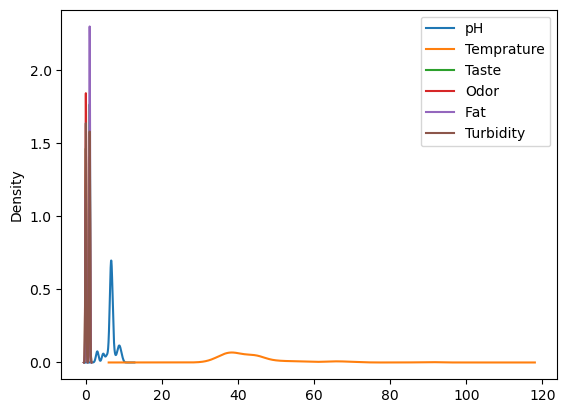

In [11]:
cols = milkdata.columns[:6]
densityplot = milkdata[cols].plot(kind='density')

In [12]:
milkdata.Grade.value_counts()

0    429
1    374
2    256
Name: Grade, dtype: int64

C:\Users\RAMAKRISHNAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


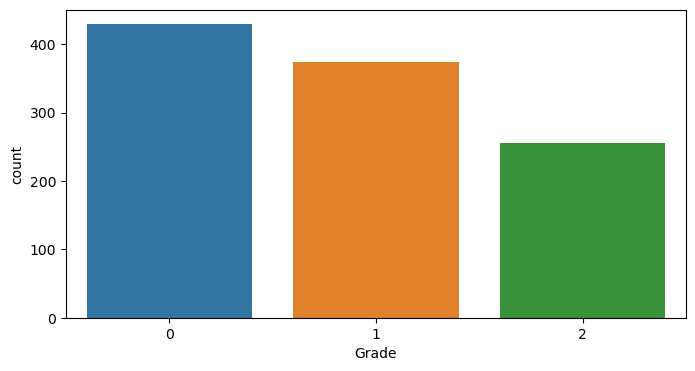

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(milkdata['Grade'])
plt.show()

# FINDING CORRELATION

In [14]:
milkdata.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,0.028980
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.417789
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,0.025500
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,0.149626
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,0.151002
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.153634
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.056986
Grade,0.028980,-0.417789,0.025500,0.149626,0.151002,-0.153634,-0.056986,1.000000


<AxesSubplot:>

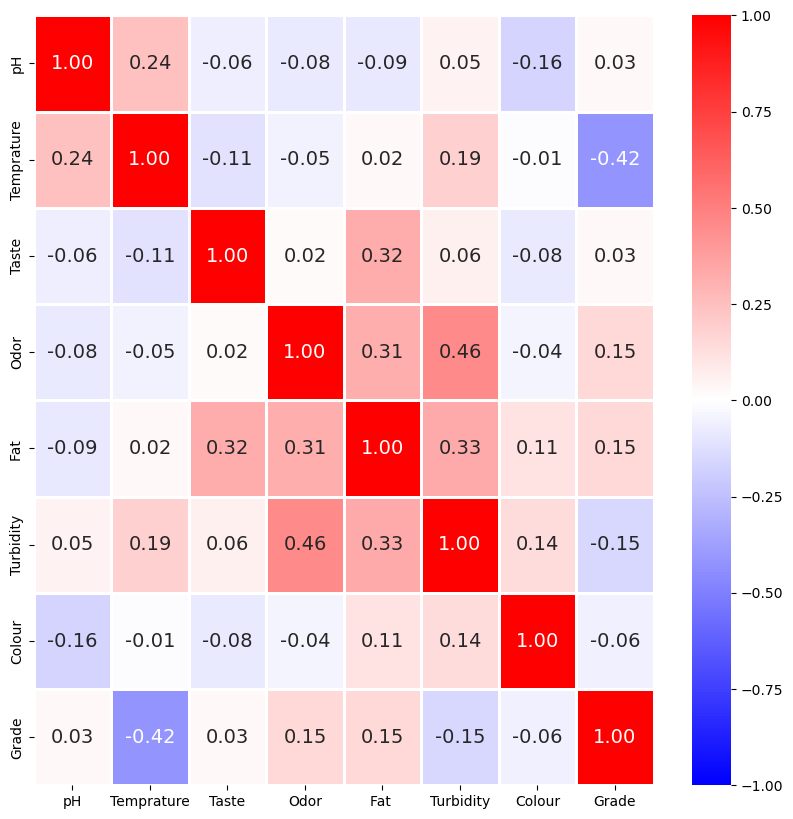

In [15]:
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(milkdata.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "bwr")

# SPLITTING TRAIN AND TEST DATASET

In [16]:
x=milkdata.drop(['Grade'],axis=1)
y=milkdata['Grade']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [18]:
X_train

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
899,6.6,43,0,0,1,0,250
635,6.5,38,1,0,0,0,255
310,6.6,37,1,1,1,1,255
961,9.0,43,1,1,1,1,248
723,3.0,40,1,1,1,1,255
...,...,...,...,...,...,...,...
1033,6.6,38,0,0,0,0,255
763,5.6,50,0,1,1,1,255
835,4.7,38,1,0,1,0,255
559,9.0,43,1,0,1,1,250


# LOGISTIC REGRESSION

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\RAMAKRISHNAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_predicted = model.predict(X_test)


In [21]:
model.score(X_test,y_test)

0.7327044025157232

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

# SUPPORT VECTOR MACHINE

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# RANDOM FOREST

In [24]:
from sklearn.metrics import confusion_matrix  
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print(confusionmatrix)

[[113   1   2]
 [  0 116   0]
 [  3  21  62]]


In [25]:
print(accuracy_score(y_test,prediction))

0.9150943396226415


In [26]:
import pickle

In [27]:
filename = 'milk_model_1.sav'
pickle.dump(model, open(filename, 'wb'))

In [28]:
load_model = pickle.load(open('milk_model_1.sav', 'rb'))